In [1]:
#Import some neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# View data and pre-processing

In [2]:
#Load in the dataset and view
virus_df = pd.read_csv('2022QUB.csv')
virus_df.head()

,SID,Type,Matrix,Load,I001,I002,I003,I004,I005,I006,...,I503,I504,I505,I506,I507,I508,I509,I510,I511,I512
0,S1,X,dmem,1,97.78,97.73,97.68,97.70,97.73,97.73,...,83.38,84.49,84.94,85.47,86.16,86.79,87.12,87.20,87.58,88.20
1,S1,X,dmem,1,97.75,97.70,97.70,97.71,97.71,97.72,...,83.65,84.77,85.34,85.27,85.69,85.52,85.27,85.28,85.41,85.65
2,S1,X,dmem,1,97.76,97.72,97.70,97.74,97.71,97.71,...,84.46,85.38,86.03,86.38,86.77,87.10,87.14,86.89,87.14,87.79
3,S1,X,dmem,1,97.72,97.71,97.71,97.73,97.70,97.71,...,83.96,84.89,85.43,85.30,85.80,86.18,86.39,86.63,87.21,87.76
4,S1,X,dmem,1,97.74,97.66,97.65,97.68,97.67,97.65,...,83.65,84.02,84.33,84.53,85.14,85.40,85.41,85.42,85.88,85.87


In [3]:
#Summary values for each column
virus_df.describe()

,Load,I001,I002,I003,I004,I005,I006,I007,I008,I009,...,I503,I504,I505,I506,I507,I508,I509,I510,I511,I512
count,3801.000000,3801.00000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,...,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000
mean,4.015259,94.65562,94.645662,94.640797,94.629976,94.617727,94.609816,94.577929,94.550316,94.531181,...,85.624488,86.004936,86.365491,86.747143,87.125264,87.331589,87.534875,87.741886,87.914770,88.071718
std,2.067487,2.57733,2.584697,2.584932,2.591785,2.593300,2.588944,2.585280,2.575187,2.572254,...,2.130029,2.181635,2.215189,2.232610,2.246044,2.286217,2.299715,2.304504,2.331248,2.379595
min,1.000000,80.95000,80.890000,80.830000,80.800000,80.760000,80.840000,80.910000,80.890000,80.830000,...,71.640000,71.950000,72.190000,72.550000,73.030000,73.210000,73.290000,73.240000,73.110000,72.940000
25%,2.000000,92.87000,92.870000,92.860000,92.820000,92.800000,92.760000,92.740000,92.750000,92.740000,...,84.500000,84.830000,85.180000,85.590000,85.940000,86.120000,86.290000,86.450000,86.570000,86.700000
50%,4.000000,94.53000,94.510000,94.520000,94.510000,94.480000,94.490000,94.440000,94.430000,94.410000,...,86.000000,86.430000,86.760000,87.110000,87.490000,87.670000,87.840000,88.020000,88.180000,88.300000
75%,6.000000,96.07000,96.040000,96.030000,96.030000,96.020000,96.030000,96.010000,95.970000,95.940000,...,87.070000,87.530000,87.900000,88.260000,88.640000,88.900000,89.170000,89.380000,89.570000,89.730000
max,8.000000,100.71000,100.620000,100.550000,100.540000,100.540000,100.440000,100.310000,100.230000,100.220000,...,90.100000,90.810000,91.300000,91.650000,91.900000,92.090000,92.410000,92.600000,92.960000,93.580000


In [4]:
virus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801 entries, 0 to 3800
Columns: 516 entries, SID to I512
dtypes: float64(512), int64(1), object(3)
memory usage: 15.0+ MB


In [5]:
#Check for missing values
#pd.set_option('display.max_rows',None)
virus_df.isna().any()

SID       False
Type      False
Matrix    False
Load      False
I001      False
          ...  
I508      False
I509      False
I510      False
I511      False
I512      False
Length: 516, dtype: bool

In [6]:
#Split the dataset by Matrix type (dmem and pbs)
is_dmem = virus_df['Matrix'] == ' dmem'
virus_df_dmem = virus_df[is_dmem]

is_pbs = virus_df['Matrix'] == ' pbs'
virus_df_pbs = virus_df[is_pbs]

In [7]:
#Drop Matrix column is each split dataset as it's not needed now
virus_df_dmem = virus_df_dmem.drop(columns=['Matrix'], axis = 1)

virus_df_pbs = virus_df_pbs.drop(columns=['Matrix'], axis = 1)

In [8]:
virus_df_pbs

,SID,Type,Load,I001,I002,I003,I004,I005,I006,I007,...,I503,I504,I505,I506,I507,I508,I509,I510,I511,I512
120,S1,X,1,99.39,99.46,99.44,99.43,99.44,99.40,99.38,...,86.44,86.93,87.26,87.64,88.09,88.27,88.68,89.18,89.42,89.26
121,S1,X,1,99.38,99.48,99.55,99.64,99.65,99.57,99.46,...,86.63,87.43,87.48,87.78,88.20,88.39,88.26,89.04,89.80,90.32
122,S1,X,1,99.49,99.51,99.57,99.64,99.70,99.63,99.55,...,86.40,87.46,87.94,88.45,88.92,89.19,89.54,90.27,90.85,91.41
123,S1,X,1,99.37,99.44,99.46,99.50,99.48,99.39,99.30,...,86.46,86.98,87.56,88.03,88.36,88.68,89.00,89.28,89.61,89.91
124,S1,X,1,99.49,99.51,99.57,99.67,99.69,99.61,99.53,...,87.17,87.85,88.26,88.74,89.17,89.17,89.31,89.68,89.99,90.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,S4,Y,8,93.44,93.46,93.47,93.40,93.37,93.39,93.41,...,85.80,86.40,87.05,87.59,87.83,88.15,88.67,88.93,89.01,89.61
3797,S4,Y,8,93.68,93.58,93.55,93.47,93.40,93.41,93.37,...,85.30,85.65,85.60,85.74,86.54,87.18,87.63,87.65,87.72,88.06
3798,S4,Y,8,93.66,93.65,93.64,93.57,93.51,93.48,93.45,...,86.19,86.55,86.56,86.90,87.32,87.34,87.34,87.63,88.10,88.82
3799,S4,Y,8,93.20,93.19,93.27,93.25,93.23,93.20,93.20,...,85.55,86.02,86.48,86.85,86.90,87.07,87.31,87.51,88.15,89.05


Text(0.5, 1.0, 'pbs')

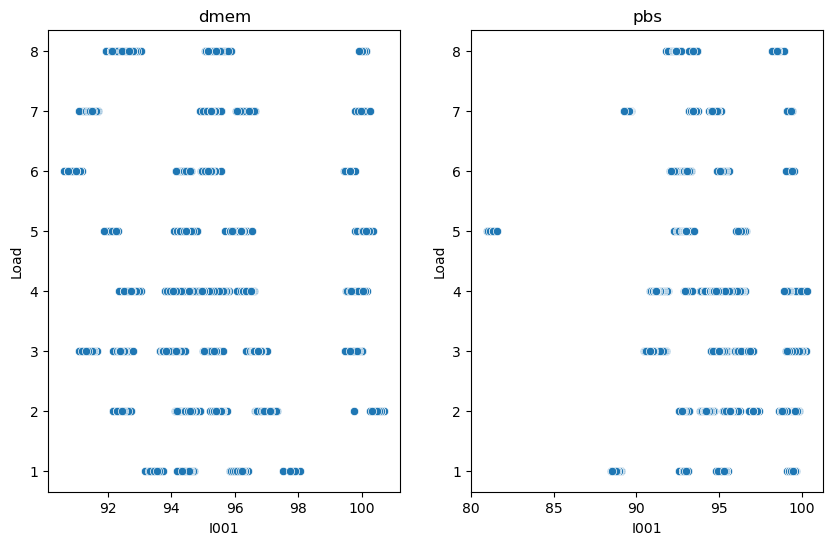

In [9]:
#Display distribution of light intensity values for each load 
fig, ax = plt.subplots(1,2, figsize = (10,6))

sns.scatterplot(data = virus_df_dmem, x = 'I001', y = 'Load', ax = ax[0])
ax[0].set_title("dmem")

sns.scatterplot(data = virus_df_pbs, x = 'I001', y = 'Load', ax = ax[1])
ax[1].set_title("pbs")

Text(0.5, 1.0, 'pbs')

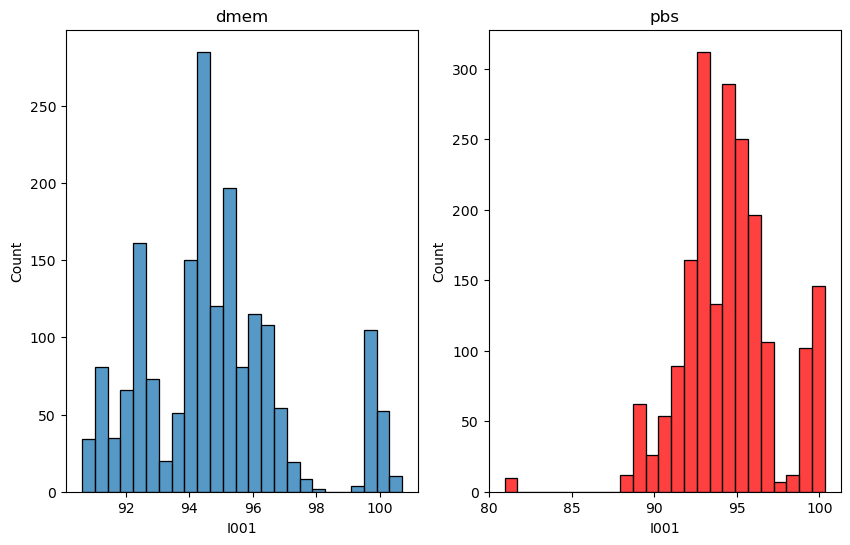

In [10]:
fig, ax = plt.subplots(1,2, figsize = (10,6))

sns.histplot(virus_df_dmem['I001'], bins = 25, ax = ax[0])
ax[0].set_title("dmem")

sns.histplot(virus_df_pbs['I001'], bins = 25, ax = ax[1], color = 'r')
ax[1].set_title("pbs")

Text(0.5, 1.0, 'pbs')

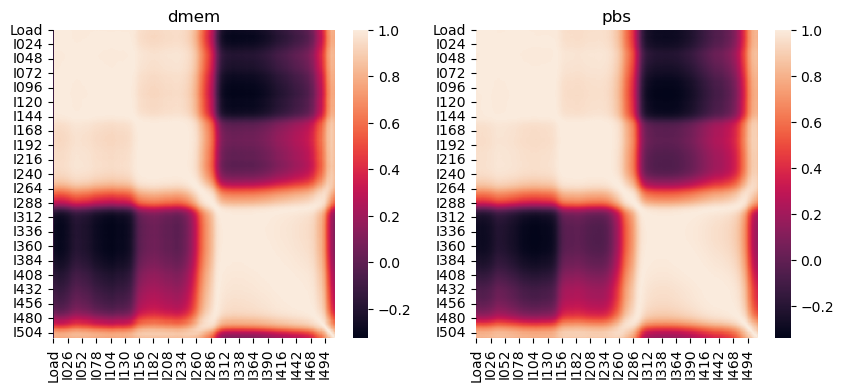

In [11]:
fig, ax = plt.subplots(1,2, figsize = (10,4))

#Correlation between all light wavelengths
corr_mat_dmem = virus_df_dmem.corr(numeric_only=True)
corr_mat_pbs = virus_df_pbs.corr(numeric_only=True)

#Display heatmap for each correlation matrix
sns.heatmap(corr_mat_dmem, ax = ax[0])
ax[0].set_title("dmem")

sns.heatmap(corr_mat_pbs, ax = ax[1])
ax[1].set_title("pbs")

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Scale the data
light_df_dmem = virus_df_dmem.drop(columns = ['SID','Type','Load'], axis = 1)
light_df_scaled_dmem = pd.DataFrame(scaler.fit_transform(light_df_dmem), index = light_df_dmem.index, columns = light_df_dmem.columns)

light_df_pbs = virus_df_pbs.drop(columns = ['SID','Type','Load'], axis = 1)
light_df_scaled_pbs = pd.DataFrame(scaler.fit_transform(light_df_pbs), index = light_df_pbs.index, columns = light_df_pbs.columns)

light_cols = virus_df_dmem.columns[3:516]

#Creation of scaled original dataframe

virus_df_scaled_dmem = pd.concat([(virus_df_dmem.drop(columns=light_cols, axis=1)), light_df_scaled_dmem], axis = 1)
virus_df_scaled_pbs = pd.concat([(virus_df_pbs.drop(columns=light_cols, axis=1)), light_df_scaled_pbs], axis = 1)

In [13]:
from sklearn.ensemble import IsolationForest

#Detect outliers using Isolation Forest
IForest = IsolationForest(random_state=42)

outlier_pred_dmem = IForest.fit_predict(light_df_scaled_dmem)
outlier_pred_pbs = IForest.fit_predict(light_df_scaled_pbs)

#Outliers when -1 so single out rows with 1
virus_df_scaled_no_out_dmem = virus_df_scaled_dmem.iloc[outlier_pred_dmem == 1]
virus_df_scaled_no_out_pbs = virus_df_scaled_pbs.iloc[outlier_pred_pbs == 1]

print("Number of rows in dmem dataset after outlier removal = {}".format(virus_df_scaled_no_out_dmem.shape[0]))
print("Number of rows in pbs dataset after outlier removal = {}".format(virus_df_scaled_no_out_pbs.shape[0]))

Number of rows in dmem dataset after outlier removal = 1276
Number of rows in pbs dataset after outlier removal = 1406


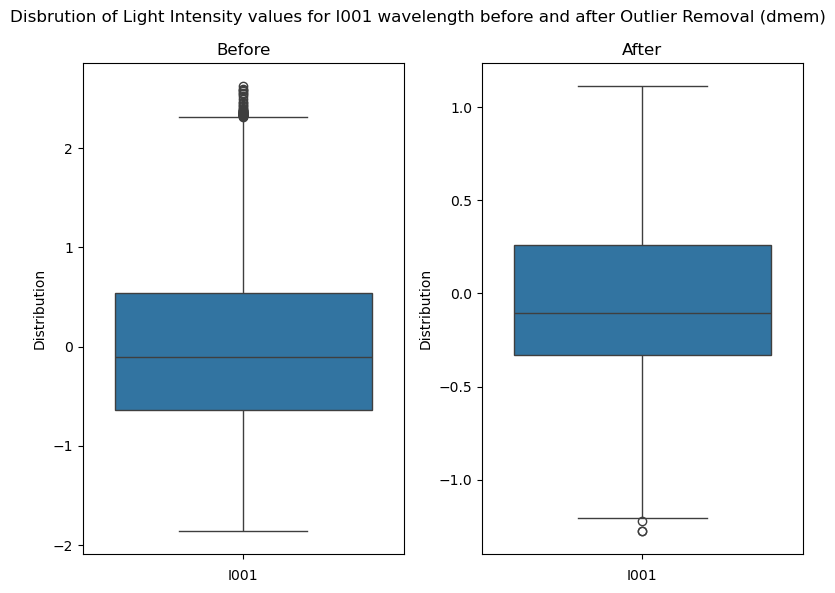

In [14]:
#Display the distribution of light intensity values before and after outlier removal for dmem dataset
fig, ax = plt.subplots(1,2, figsize = (8,6))
fig.suptitle("Disbrution of Light Intensity values for I001 wavelength before and after Outlier Removal (dmem)")

sns.boxplot(virus_df_scaled_dmem['I001'], ax = ax[0])
ax[0].set_xlabel("I001")
ax[0].set_ylabel("Distribution")
ax[0].set_title("Before")

sns.boxplot(virus_df_scaled_no_out_dmem['I001'], ax = ax[1])
ax[1].set_xlabel("I001")
ax[1].set_ylabel("Distribution")
ax[1].set_title("After")

plt.tight_layout()

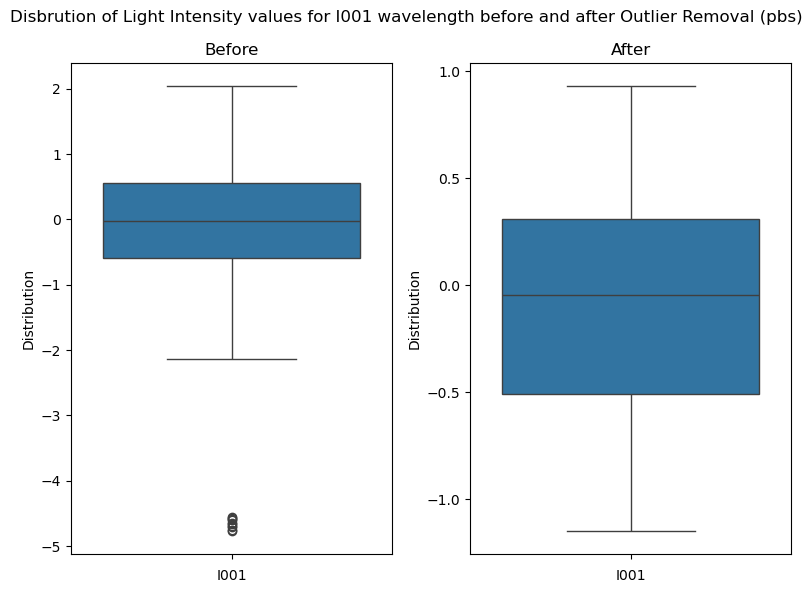

In [15]:
#Display the distribution of light intensity values before and after outlier removal for pbs dataset
fig, ax = plt.subplots(1,2, figsize = (8,6))
fig.suptitle("Disbrution of Light Intensity values for I001 wavelength before and after Outlier Removal (pbs)")

sns.boxplot(virus_df_scaled_pbs['I001'], ax = ax[0])
ax[0].set_xlabel("I001")
ax[0].set_ylabel("Distribution")
ax[0].set_title("Before")

sns.boxplot(virus_df_scaled_no_out_pbs['I001'], ax = ax[1])
ax[1].set_xlabel("I001")
ax[1].set_ylabel("Distribution")
ax[1].set_title("After")

plt.tight_layout()

# Regression

## Train/Test split data

In [16]:
from sklearn.model_selection import train_test_split

#Spliting datasets into independent and dependent variables
X_dmem = virus_df_scaled_no_out_dmem.drop(columns=['SID','Type','Load'])
X_dmem = np.asarray(X_dmem)
y_dmem = virus_df_scaled_no_out_dmem['Load']
y_dmem = np.asarray(y_dmem)

X_pbs = virus_df_scaled_no_out_pbs.drop(columns=['SID','Type','Load'])
X_pbs = np.asarray(X_pbs)
y_pbs = virus_df_scaled_no_out_pbs['Load']
y_pbs = np.asarray(y_pbs)

#Split the datasets into training and test data with stratification relative to Load value
X_train_dmem, X_test_dmem, y_train_dmem, y_test_dmem = train_test_split(X_dmem, y_dmem, test_size = 0.2, random_state=42, stratify=virus_df_scaled_no_out_dmem['Load'])
X_train_pbs, X_test_pbs, y_train_pbs, y_test_pbs = train_test_split(X_pbs, y_pbs, test_size = 0.2, random_state=42, stratify=virus_df_scaled_no_out_pbs['Load'])

In [17]:
#Returns list of unique values in y training data and the counts of each
unique_train_dmem, count_train_dmem= np.unique(y_train_dmem, return_counts=True)
unique_test_dmem, count_test_dmem= np.unique(y_test_dmem, return_counts=True)

unique_train_pbs, count_train_pbs= np.unique(y_train_dmem, return_counts=True)
unique_test_pbs, count_test_pbs= np.unique(y_train_dmem, return_counts=True)

#Returns the ratio of each unique value 
train_dmem_ratio = dict(zip(unique_train_dmem, count_train_dmem/len(y_train_dmem)))
test_dmem_ratio = dict(zip(unique_test_dmem, count_test_dmem/len(y_test_dmem)))

train_pbs_ratio = dict(zip(unique_train_pbs, count_train_pbs/len(y_train_pbs)))
test_pbs_ratio = dict(zip(unique_test_pbs, count_test_pbs/len(y_test_pbs)))

In [18]:
#Check value counts
print("dmem:\nTrain set:\n\n{}     \n===============\n\nTest set: \n\n{}".format(train_dmem_ratio, test_dmem_ratio))
print("pbs:\nTrain set:\n\n{}     \n===============\n\nTest set: \n\n{}".format(train_pbs_ratio, test_pbs_ratio))

dmem:
Train set:

{1: 0.0784313725490196, 2: 0.23529411764705882, 3: 0.17352941176470588, 4: 0.19901960784313724, 5: 0.0784313725490196, 6: 0.0784313725490196, 7: 0.0392156862745098, 8: 0.11764705882352941}     

Test set: 

{1: 0.078125, 2: 0.234375, 3: 0.17578125, 4: 0.19921875, 5: 0.078125, 6: 0.078125, 7: 0.0390625, 8: 0.1171875}
pbs:
Train set:

{1: 0.0711743772241993, 2: 0.21352313167259787, 3: 0.15747330960854092, 4: 0.1806049822064057, 5: 0.0711743772241993, 6: 0.0711743772241993, 7: 0.03558718861209965, 8: 0.10676156583629894}     

Test set: 

{1: 0.28368794326241137, 2: 0.851063829787234, 3: 0.6276595744680851, 4: 0.7198581560283688, 5: 0.28368794326241137, 6: 0.28368794326241137, 7: 0.14184397163120568, 8: 0.425531914893617}


## The models

In [19]:
#Import neccesary regression models 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Initiate regression models and fit to training data to predict y
lin_reg = LinearRegression()
lin_reg.fit(X_train_dmem, y_train_dmem)
y_pred_lin = lin_reg.predict(X_test_dmem)

RFR = RandomForestRegressor()
RFR.fit(X_train_pbs, y_train_pbs)
y_pred_RFR = RFR.predict(X_test_pbs)

Text(0.5, 1.0, 'Random Forest Regression on pbs set')

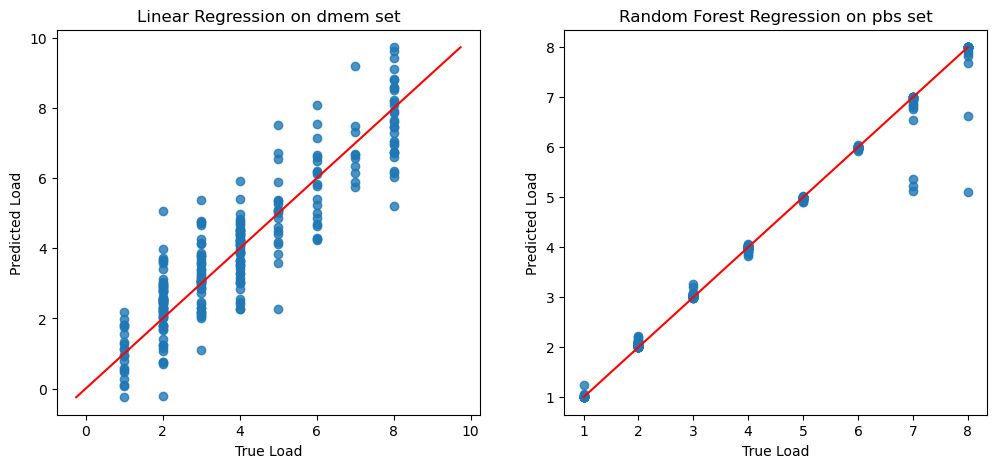

In [20]:
fig, ax = plt.subplots(1,2, figsize = (12,5))

ax[0].scatter(y_test_dmem, y_pred_lin, alpha = 0.8)
ax[0].plot([min(y_pred_lin), max(y_pred_lin)],[min(y_pred_lin), max(y_pred_lin)], color = 'r')
ax[0].set_xlabel("True Load")
ax[0].set_ylabel("Predicted Load")
ax[0].set_title("Linear Regression on dmem set")

ax[1].scatter(y_test_pbs, y_pred_RFR, alpha = 0.8)
ax[1].plot([min(y_pred_RFR), max(y_pred_RFR)],[min(y_pred_RFR), max(y_pred_RFR)], color = 'r')
ax[1].set_xlabel("True Load")
ax[1].set_ylabel("Predicted Load")
ax[1].set_title("Random Forest Regression on pbs set")

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Function to calculate metrics including mean squared error, mean absolute error and r2 score
def metrics(y, y_hat):
    mse = mean_squared_error(y, y_hat)
    mae = mean_absolute_error(y, y_hat)
    r2 = r2_score(y, y_hat)

    return mse, mae, r2

#Metrics calculated for each model
lin_reg_metrics = metrics(y_test_dmem, y_pred_lin)
print("Linear Regression:\nMean Squared Error = {}\nMean Absolute Error = {}\nR^2 Score = {}\n".format(lin_reg_metrics[0], lin_reg_metrics[1], lin_reg_metrics[2]))

RFR_metrics = metrics(y_test_pbs, y_pred_RFR)
print("Random Forest Regression:\nMean Squared Error = {}\nMean Absolute Error = {}\nR^2 Score = {}\n".format(RFR_metrics[0], RFR_metrics[1], RFR_metrics[2]))

Linear Regression:
Mean Squared Error = 0.9087882907138098
Mean Absolute Error = 0.7465141481741602
R^2 Score = 0.7948633495092902

Random Forest Regression:
Mean Squared Error = 0.07358758865248229
Mean Absolute Error = 0.06173758865248226
R^2 Score = 0.9830713038497587



In [22]:
from sklearn.model_selection import cross_val_score

#Perform Cross validation for each model to obtain Mean Squared Error
lin_reg_scores = cross_val_score(lin_reg, X_train_dmem, y_train_dmem, scoring = 'neg_mean_squared_error', cv = 5)
lin_reg_score_mean = np.mean(-lin_reg_scores)

RFR_scores = cross_val_score(RFR, X_train_pbs, y_train_pbs, scoring = 'neg_mean_squared_error', cv = 5)
RFR_score_mean = np.mean(-RFR_scores)

In [23]:
print("Mean Squared Error using Cross Validation Score:\nLinear Regression MSE = {}\nRandom Forest Regressor MSE = {}".format(np.round(lin_reg_score_mean, 2), np.round(RFR_score_mean, 4)))

Mean Squared Error using Cross Validation Score:
Linear Regression MSE = 1.22
Random Forest Regressor MSE = 0.0432


In [24]:
#Perform Cross validation for each model to obtain r^2 score
lin_reg_r_scores = cross_val_score(lin_reg, X_train_dmem, y_train_dmem, scoring = 'r2', cv = 5)
lin_reg_r_mean = np.mean(lin_reg_r_scores)

RFR_r_scores = cross_val_score(RFR, X_train_pbs, y_train_pbs, scoring = 'r2', cv = 5)
RFR_r_mean = np.mean(RFR_r_scores)

In [25]:
print("r^2 using Cross Validation Score:\nLinear Regression r^2 = {}\nRandom Forest Regressor r^2 = {}".format(np.round(lin_reg_r_mean, 2), np.round(RFR_r_mean, 2)))

r^2 using Cross Validation Score:
Linear Regression r^2 = 0.72
Random Forest Regressor r^2 = 0.99


## Model Optimization

In [26]:
#Model Optimization
from sklearn.model_selection import GridSearchCV

RF_Regressor = RandomForestRegressor(random_state=42)

#Select distribution of parameter values to be tested
params = {'n_estimators': [80, 100], 'max_depth': [None, 10], 'min_samples_split': [2,3], 'min_samples_leaf': [1], 'max_features': ['log2',None]}

#Grid search of parameter values i.e. exhaustive search
grid_search = GridSearchCV(RF_Regressor, params, cv = 3, scoring = 'neg_mean_squared_error', error_score='raise')
grid_search.fit(X_train_pbs, y_train_pbs)

GridSearchCV(cv=3, error_score='raise',
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10],
                         'max_features': ['log2', None],
                         'min_samples_leaf': [1], 'min_samples_split': [2, 3],
                         'n_estimators': [80, 100]},
             scoring='neg_mean_squared_error')

In [27]:
#Return the best Random Forest Regressor model 
best_RFR = grid_search.best_estimator_
#Return the parameters corressponding to the best model
grid_search.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 80}

In [28]:
#Use best model to predict values
predict_RFR_best = best_RFR.predict(X_test_pbs)
mse_best = mean_squared_error(y_test_pbs, predict_RFR_best)
print("Best Mean Squared Error for Random Forest Regressor = {}".format(mse_best))
print(r2_score(y_test_pbs, predict_RFR_best))

Best Mean Squared Error for Random Forest Regressor = 0.009274711879432624
0.9978663687428403


Text(0, 0.5, 'Predicted Load')

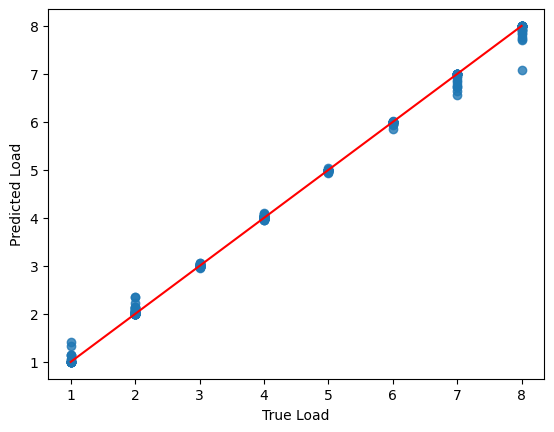

In [29]:
plt.scatter(y_test_pbs, predict_RFR_best, alpha = 0.8)
plt.plot([min(predict_RFR_best), max(predict_RFR_best)],[min(predict_RFR_best), max(predict_RFR_best)], color = 'r')
plt.xlabel("True Load")
plt.ylabel("Predicted Load")

# Classification

## Encoding and Train/Test Split

In [30]:
from sklearn.preprocessing import LabelBinarizer

#X and y data for classification
X_c_dmem = virus_df_scaled_no_out_dmem.drop(columns=['SID','Type','Load'], axis = 1)
X_c_dmem = np.asarray(X_c_dmem)
y_c_dmem = virus_df_scaled_no_out_dmem['Type']

#Turning y data into binary code (X - 0 and Y - 1)
lb_dmem = LabelBinarizer()
y_c_dmem = lb_dmem.fit_transform(y_c_dmem)
y_c_dmem = np.squeeze(y_c_dmem)

X_c_pbs = virus_df_scaled_no_out_pbs.drop(columns=['SID','Type','Load'], axis = 1)
X_c_pbs = np.asarray(X_c_pbs)
y_c_pbs = virus_df_scaled_no_out_pbs['Type']

lb_pbs = LabelBinarizer()
y_c_pbs = lb_pbs.fit_transform(y_c_pbs)
y_c_pbs = np.squeeze(y_c_pbs)

In [31]:
#Obtaining number of X and Y values within each dataset
unique_dmem, count_dmem = np.unique(y_c_dmem, return_counts=True)
ratio_samps_dmem = dict(zip(unique_dmem, count_dmem))
print("dmem - Ratio of Types before Sampling: \n{}\n".format(ratio_samps_dmem))

unique_pbs, count_pbs = np.unique(y_c_pbs, return_counts=True)
ratio_samps_pbs = dict(zip(unique_pbs, count_pbs))
print("pbs - Ratio of Types before Sampling: \n{}".format(ratio_samps_pbs))

dmem - Ratio of Types before Sampling: 
{0: 472, 1: 804}

pbs - Ratio of Types before Sampling: 
{0: 505, 1: 901}


In [32]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#SMOTE used to synthesize more observations with Type X
over_dmem = SMOTE(sampling_strategy=0.794, random_state=42)
X_c_dmem, y_c_dmem = over_dmem.fit_resample(X_c_dmem, y_c_dmem)

#Random Under Sampler used to eliminate observations with Type Y to balance dataset
under_dmem = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_c_dmem, y_c_dmem = under_dmem.fit_resample(X_c_dmem, y_c_dmem)

over_pbs = SMOTE(sampling_strategy=0.781, random_state=42)
X_c_pbs, y_c_pbs = over_pbs.fit_resample(X_c_pbs, y_c_pbs)

under_pbs = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_c_pbs, y_c_pbs = under_pbs.fit_resample(X_c_pbs, y_c_pbs)

In [33]:
#Number of Types counted to ensure balanced dataset
unique_dmem, count_dmem = np.unique(y_c_dmem, return_counts=True)
ratio_samps_dmem = dict(zip(unique_dmem, count_dmem))
print("dmem - Ratio of Types After Sampling: \n{}\n".format(ratio_samps_dmem))

unique_pbs, count_pbs = np.unique(y_c_pbs, return_counts=True)
ratio_samps_pbs = dict(zip(unique_pbs, count_pbs))
print("pbs - Ratio of Types After Sampling: \n{}".format(ratio_samps_pbs))

dmem - Ratio of Types After Sampling: 
{0: 638, 1: 638}

pbs - Ratio of Types After Sampling: 
{0: 703, 1: 703}


In [34]:
#Spliting datasets into training and test data
X_c_train_dmem, X_c_test_dmem, y_c_train_dmem, y_c_test_dmem = train_test_split(X_c_dmem, y_c_dmem, test_size=0.2, random_state=42, stratify=virus_df_scaled_no_out_dmem['Type'])
X_c_train_pbs, X_c_test_pbs, y_c_train_pbs, y_c_test_pbs = train_test_split(X_c_pbs, y_c_pbs, test_size=0.2, random_state=42, stratify=virus_df_scaled_no_out_pbs['Type'])

In [35]:
unique_train_dmem_c, count_train_dmem_c= np.unique(y_c_train_dmem, return_counts=True)
unique_test_dmem_c, count_test_dmem_c= np.unique(y_c_test_dmem, return_counts=True)

unique_train_pbs_c, count_train_pbs_c= np.unique(y_c_train_pbs, return_counts=True)
unique_test_pbs_c, count_test_pbs_c= np.unique(y_c_test_pbs, return_counts=True)

train_dmem_ratio_c = dict(zip(unique_train_dmem_c, count_train_dmem_c/len(y_c_train_dmem)))
test_dmem_ratio_c = dict(zip(unique_test_dmem_c, count_test_dmem_c/len(y_c_test_dmem)))

train_pbs_ratio_c = dict(zip(unique_train_pbs_c, count_train_pbs_c/len(y_c_train_pbs)))
test_pbs_ratio_c = dict(zip(unique_test_pbs_c, count_test_pbs_c/len(y_c_test_pbs)))

In [36]:
#Check value counts
print("CLASSIFICATION:\n\n dmem:\nTrain set:\n\n{}     \n===============\n\nTest set: \n\n{}".format(train_dmem_ratio_c, test_dmem_ratio_c))
print("pbs:\nTrain set:\n\n{}     \n===============\n\nTest set: \n\n{}".format(train_pbs_ratio_c, test_pbs_ratio_c))

CLASSIFICATION:

 dmem:
Train set:

{0: 0.5049019607843137, 1: 0.4950980392156863}     

Test set: 

{0: 0.48046875, 1: 0.51953125}
pbs:
Train set:

{0: 0.5026690391459074, 1: 0.4973309608540925}     

Test set: 

{0: 0.48936170212765956, 1: 0.5106382978723404}


## Modelling

In [37]:
#import classification models
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#Logistic Regressiong model declared and applied to the test data
model_LR = LogisticRegression(max_iter=300)
model_LR.fit(X_c_train_dmem, y_c_train_dmem)
predict_LR = model_LR.predict(X_c_test_dmem)
score_LR = accuracy_score(y_c_test_dmem, predict_LR)

#Linear SVC model declared and applied to the test data
model_SVC = LinearSVC()
model_SVC.fit(X_c_train_pbs, y_c_train_pbs)
predict_SVC = model_SVC.predict(X_c_test_pbs)
score_SVC = accuracy_score(y_c_test_pbs, predict_SVC)

print("Logistic Regression Accuracy = {}".format(score_LR))
print("Linear SVC Accuracy = {}".format(score_SVC))

Logistic Regression Accuracy = 0.99609375
Linear SVC Accuracy = 0.9964539007092199


In [38]:
#Bias and varience calculated for Logistic Regression model
variance_LR = np.var(predict_LR)
sse_LR = np.mean((np.mean(predict_LR) - y_c_test_dmem) ** 2)
bias_LR = sse_LR - variance_LR

print(variance_LR)
print(bias_LR)

#Bias and varience calculated for Linear SVC model
variance_SVC = np.var(predict_SVC)
sse_SVC = np.mean((np.mean(predict_SVC) - y_c_test_pbs) ** 2)
bias_SVC = sse_SVC - variance_SVC

print(variance_SVC)
print(bias_SVC)

0.24945068359375
0.00018310546875
0.24979880287711875
0.000100598561440568


In [39]:
#Cross Validation performed for both models
log_reg_score = cross_val_score(model_LR, X_c_train_dmem, y_c_train_dmem, scoring='r2', cv = 10)
lin_SVC_score = cross_val_score(model_SVC, X_c_train_pbs, y_c_train_pbs, scoring='r2', cv = 10)
print("Logistic Regression r^2 score = {}\nLinear SVC r^2 score = {}".format(np.mean(log_reg_score), np.mean(lin_SVC_score)))

Logistic Regression r^2 score = 0.9529336349924586
Linear SVC r^2 score = 0.9893159033948506


In [40]:
from sklearn.metrics import classification_report

#Create classification reports for both models to observe precision, recall and f1 scores
log_reg_report = pd.DataFrame(classification_report(y_c_test_dmem, predict_LR, output_dict = True))
print("Logistic Regression")
print(log_reg_report)
print("==============================================\n")
lin_SVC_report = pd.DataFrame(classification_report(y_c_test_pbs, predict_SVC, output_dict = True))
print("Linear SVC")
print(lin_SVC_report)

Logistic Regression
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.992537  0.996094    0.996269      0.996123
recall       0.991870    1.000000  0.996094    0.995935      0.996094
f1-score     0.995918    0.996255  0.996094    0.996087      0.996093
support    123.000000  133.000000  0.996094  256.000000    256.000000

Linear SVC
                    0           1  accuracy   macro avg  weighted avg
precision    1.000000    0.993103  0.996454    0.996552      0.996478
recall       0.992754    1.000000  0.996454    0.996377      0.996454
f1-score     0.996364    0.996540  0.996454    0.996452      0.996454
support    138.000000  144.000000  0.996454  282.000000    282.000000


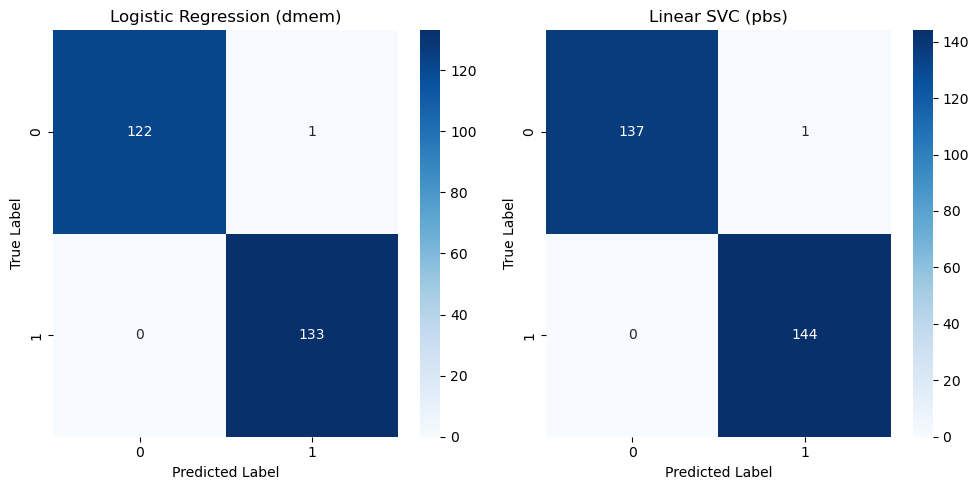

In [41]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax = ax.flatten()

#Confusion matrix and heatmap created for each model
conf_matrix_LR = confusion_matrix(y_c_test_dmem, predict_LR)
sns.heatmap(conf_matrix_LR, annot=True, fmt = 'd', cmap = 'Blues', ax = ax[0])
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("True Label")
ax[0].set_title("Logistic Regression (dmem)")

conf_matrix_SVC = confusion_matrix(y_c_test_pbs, predict_SVC)
sns.heatmap(conf_matrix_SVC, annot=True, fmt = 'd', cmap = 'Blues', ax = ax[1])
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")
ax[1].set_title("Linear SVC (pbs)")

plt.tight_layout()

In [42]:
LR_probs = model_LR.predict_proba(X_c_test_dmem)[:,1]

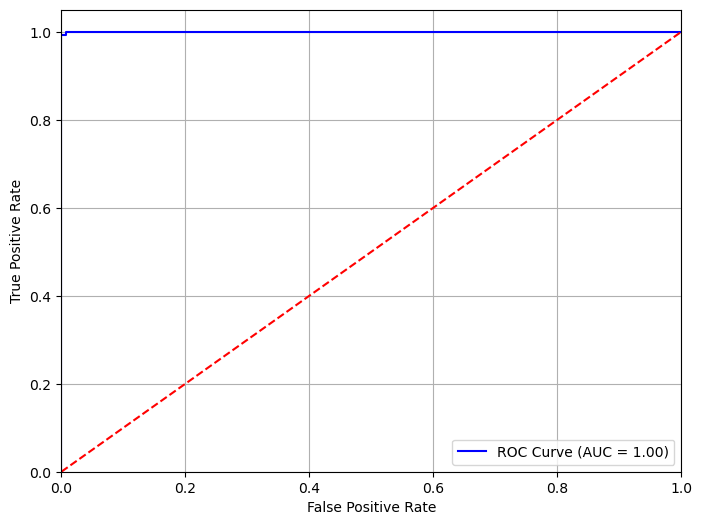

In [43]:
from sklearn.metrics import roc_curve, auc

#Obtain False Positive Rate, True Positive Rate and threshold for LR model 
fpr, tpr, thresholds = roc_curve(y_c_test_dmem, LR_probs)

#Area under curve value
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Clustering

## Principal Component Analysis

In [44]:
from sklearn.decomposition import PCA
#Initiate PCA model with number of components
pca_light_dmem = PCA(n_components=2)
pca_light_pbs = PCA(n_components=2)

#Fit PCA model to only wavelength data
pca_light_dmem.fit(light_df_scaled_dmem)
pca_light_pbs.fit(light_df_scaled_pbs)

#Transform original data
scores_dmem = pca_light_dmem.transform(light_df_scaled_dmem)
scores_pbs = pca_light_pbs.transform(light_df_scaled_pbs)

print("Explained Variance Ratio for dmem dataset {}".format(pca_light_dmem.explained_variance_ratio_))
print("Explained Variance Ratio for pbs dataset {}".format(pca_light_pbs.explained_variance_ratio_))

Explained Variance Ratio for dmem dataset [0.56702491 0.42288749]
Explained Variance Ratio for pbs dataset [0.57674779 0.41450388]


In [45]:
virus_df_light_dmem  = virus_df_dmem.drop(columns=light_cols, axis = 1)
virus_df_light_pbs  = virus_df_pbs.drop(columns=light_cols, axis = 1)

In [46]:
#Create dataframe with reduced data
scores_df_dmem = pd.DataFrame(scores_dmem, columns=['PC1','PC2'])
scores_df_pbs = pd.DataFrame(scores_pbs, columns=['PC1','PC2'])

virus_df_light_dmem = virus_df_light_dmem.reset_index()
scores_df_dmem = scores_df_dmem.reset_index()

virus_df_light_pbs = virus_df_light_pbs.reset_index()
scores_df_pbs = scores_df_pbs.reset_index()

virus_df_reduced_dmem = pd.concat([virus_df_light_dmem, scores_df_dmem], axis = 1)
virus_df_reduced_dmem.drop(columns=['index'], axis = 1)

virus_df_reduced_pbs = pd.concat([virus_df_light_pbs, scores_df_pbs], axis = 1)
virus_df_reduced_pbs.drop(columns=['index'], axis = 1)

,SID,Type,Load,PC1,PC2
0,S1,X,1,13.067997,-36.413217
1,S1,X,1,13.392913,-36.222013
2,S1,X,1,13.530700,-36.353953
3,S1,X,1,13.154732,-36.182453
4,S1,X,1,13.474575,-35.999528
...,...,...,...,...,...
1965,S4,Y,8,-2.917411,11.207331
1966,S4,Y,8,-3.230541,11.147263
1967,S4,Y,8,-2.973392,11.166356
1968,S4,Y,8,-3.321893,11.076141


In [47]:
virus_df_reduced_dmem = virus_df_reduced_dmem.drop(columns=['index'], axis = 1)

Text(0, 0.5, 'Distribution')

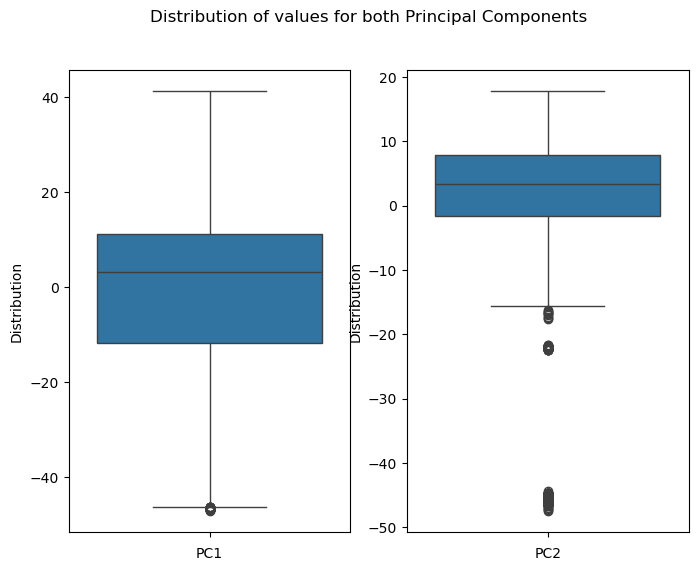

In [48]:
#Distribution for both Principal Components in dmem set
fig, ax = plt.subplots(1,2, figsize = (8,6))
fig.suptitle("Distribution of values for both Principal Components")

sns.boxplot(virus_df_reduced_dmem['PC1'], ax = ax[0])
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("Distribution")

sns.boxplot(virus_df_reduced_dmem['PC2'], ax = ax[1])
ax[1].set_xlabel("PC2")
ax[1].set_ylabel("Distribution")

Text(0, 0.5, 'PC2')

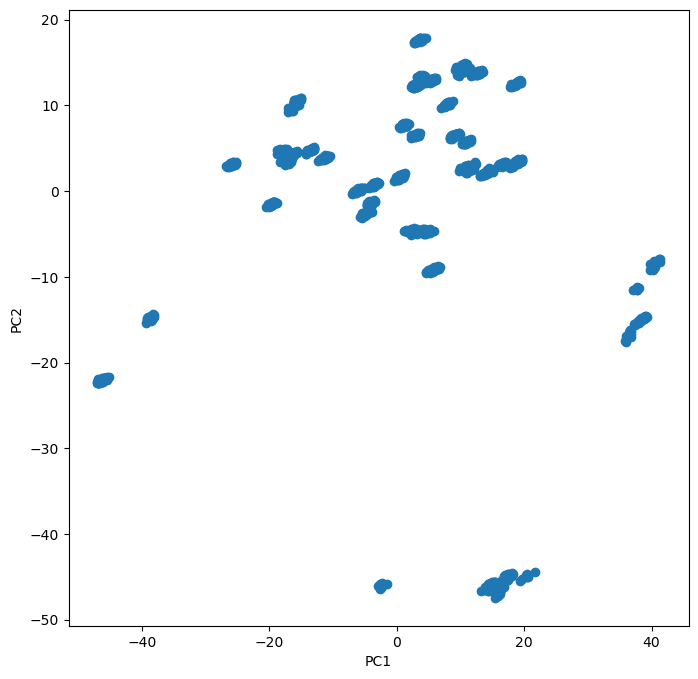

In [49]:
i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores_dmem[:,0], scores_dmem[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))


In [50]:
X_clus_dmem = virus_df_reduced_dmem.drop(columns=['SID','Type','Load'])
y_clus_dmem = virus_df_reduced_dmem['Load']

## K-means Clustering

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Range of K clustering values to iterate through
K = range(3,11)

#Store model and silhouette score for each K value in following lists
fits = []
scores = []

#Create model for each K value
for k in K:
    model_K = KMeans(n_clusters=k, n_init='auto', random_state=0).fit(X_clus_dmem)
    fits.append(model_K)
    scores.append(silhouette_score(X_clus_dmem, model_K.labels_, metric='euclidean'))

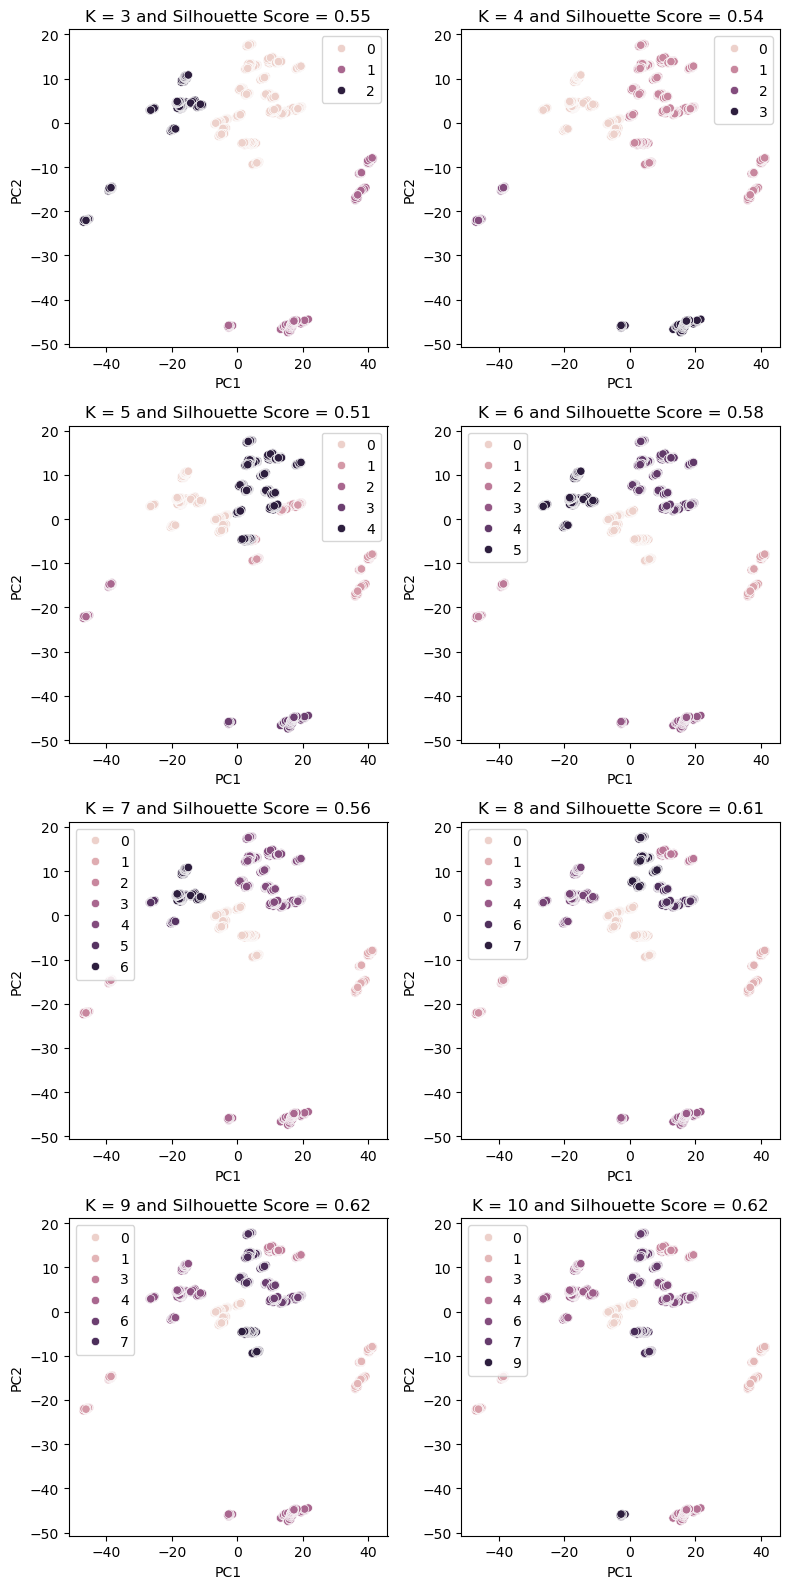

In [52]:
fig, axe = plt.subplots(4,2, figsize = (8,16))
axe = axe.flatten()

#Plot of Principal component scores with assigned cluster values for each K
for i, k in enumerate(K):
    sns.scatterplot(data = X_clus_dmem, x = 'PC1', y = 'PC2', hue = fits[i].labels_, ax = axe[i])
    axe[i].set_title("K = {} and Silhouette Score = {}".format(k, np.round(scores[i],2)))

plt.tight_layout()
plt.savefig("K-means.png")

In [53]:
#Assigning each X test observation to a cluster 
cluster_assignments = fits[5].predict(X_clus_dmem)

#Finding postion of cluster centres
cluster_centres = fits[5].cluster_centers_

predicted_values = cluster_centres[cluster_assignments]

In [54]:
predicted_values

array([[ 14.62139641, -45.74448365],
       [ 14.62139641, -45.74448365],
       [ 14.62139641, -45.74448365],
       ...,
       [ 13.45298017,   3.91722782],
       [ 13.45298017,   3.91722782],
       [ 13.45298017,   3.91722782]])

In [55]:
X_train_clus_dmem, X_clus_test_dmem, y_train_clus_dmem, y_test_clus_dmem = train_test_split(X_clus_dmem, y_clus_dmem, test_size=0.2, random_state=1)

X_train_clus_arr = np.array(X_train_clus_dmem)
X_test_clus_arr = np.array(X_clus_test_dmem)

In [56]:
from sklearn.model_selection import KFold

# Use KFold cross val to evaluate models over several k values 
# Evaluate using SSD (see inertia_ attribute of KMeans model) and Silhouette Score 
scores = []
kf = KFold(n_splits=3)

for train_index, test_index in kf.split(X_train_clus_dmem):
    
    X_train_inx = X_train_clus_arr[train_index]
    X_test_inx = X_train_clus_arr[test_index]
    
    for k in range (2,10):
        km = KMeans(n_clusters=k, random_state=10, n_init = 10)
        km.fit(X_train_inx)
        cluster_labels = km.predict(X_test_inx)

        # Sum of Squared Distances (SSD)
        ssd = km.inertia_
        
        # Silhouette score
        sil = silhouette_score(X_test_inx, cluster_labels)
        scores.append({'K': k, 'SSD': ssd, 'Silhouette': sil})

In [57]:
kscores_df = pd.DataFrame(scores)
kscores_df

,K,SSD,Silhouette
0,2,307836.985861,0.444130
1,3,153515.633960,0.557382
2,4,97698.432168,0.547131
3,5,59328.166582,0.572432
4,6,36289.670931,0.583417
5,7,24831.086729,0.591994
6,8,20694.966357,0.600534
7,9,17077.915003,0.618782
8,2,292830.892846,0.413388
9,3,150804.124807,0.541654


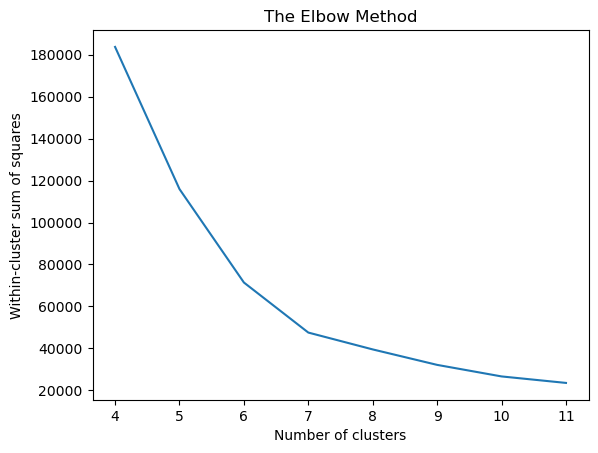

In [58]:
cs = []
for i in range(4, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_clus_dmem)
    cs.append(kmeans.inertia_)
plt.plot(range(4, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

## Hierarchical Clustering

Text(0, 0.5, 'Distribution')

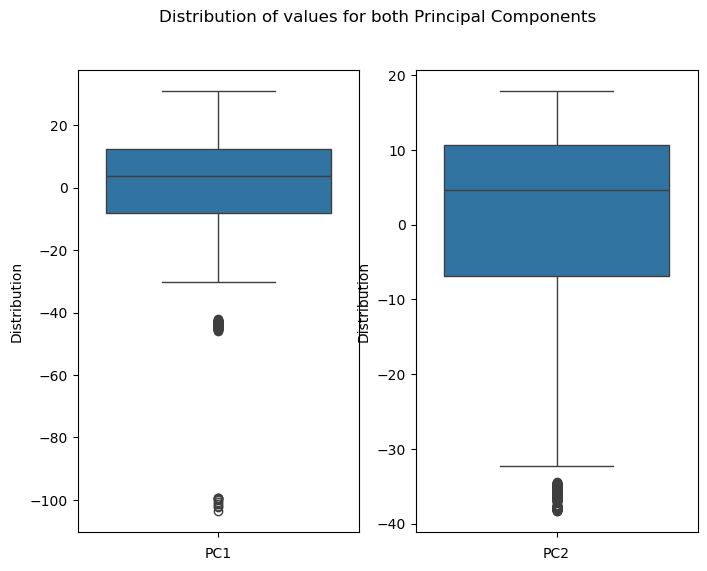

In [59]:
fig, ax = plt.subplots(1,2, figsize = (8,6))
fig.suptitle("Distribution of values for both Principal Components")

sns.boxplot(virus_df_reduced_pbs['PC1'], ax = ax[0])
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("Distribution")

sns.boxplot(virus_df_reduced_pbs['PC2'], ax = ax[1])
ax[1].set_xlabel("PC2")
ax[1].set_ylabel("Distribution")

In [60]:
scores_df_pbs = scores_df_pbs.drop(columns=['index'])

In [61]:
#Detect outliers using Isolation Forest
IForest = IsolationForest(random_state=42)

outlier_pred_pbs_clus = IForest.fit_predict(scores_df_pbs)

#Outliers when -1 so single out rows with 1
virus_df_reduced_pbs = virus_df_reduced_pbs.iloc[outlier_pred_pbs_clus == 1]

In [62]:
virus_df_reduced_pbs = virus_df_reduced_pbs.drop(columns=['index'], axis = 1)

In [63]:
X_clus_pbs = virus_df_reduced_pbs.drop(columns=['SID','Type','Load'])
y_clus_pbs = virus_df_reduced_pbs['Load']

#X_train_clus_pbs, X_clus_test_pbs, y_train_clus_pbs, y_test_clus_pbs = train_test_split(X_clus_pbs, y_clus_pbs, test_size=0.2, random_state=1)

In [64]:
from scipy.cluster.hierarchy import linkage

complete_clustering = linkage(X_clus_pbs, method="complete", metric="euclidean")

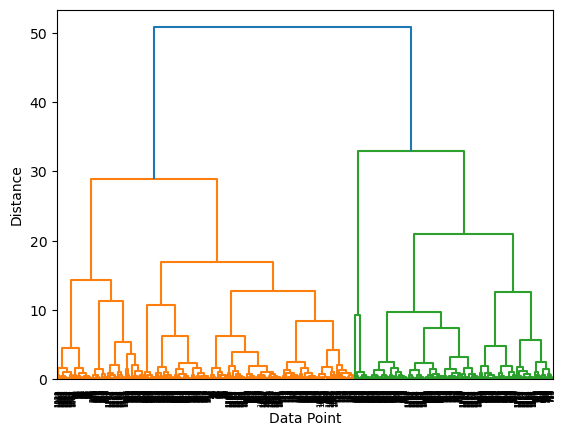

In [65]:
from scipy.cluster.hierarchy import dendrogram

dendrogram(complete_clustering)
plt.xlabel("Data Point")
plt.ylabel("Distance")
plt.show()